## Dataset Content

The dataset was provided by the Mexican government (link). This dataset contains an enormous number of anonymized patient-related information including pre-conditions. The raw dataset consists of 21 unique features and 1,048,576 unique patients. In the Boolean features, 1 means "yes" and 2 means "no". values as 97 and 99 are missing data.

    sex: female or male
    age: of the patient.
    classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different
    degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
    patient type: hospitalized or not hospitalized.
    pneumonia: whether the patient already have air sacs inflammation or not.
    pregnancy: whether the patient is pregnant or not.
    diabetes: whether the patient has diabetes or not.
    copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not.
    asthma: whether the patient has asthma or not.
    inmsupr: whether the patient is immunosuppressed or not.
    hypertension: whether the patient has hypertension or not.
    cardiovascular: whether the patient has heart or blood vessels related disease.
    renal chronic: whether the patient has chronic renal disease or not.
    other disease: whether the patient has other disease or not.
    obesity: whether the patient is obese or not.
    tobacco: whether the patient is a tobacco user.
    usmr: Indicates whether the patient treated medical units of the first, second or third level.
    medical unit: type of institution of the National Health System that provided the care.
    intubed: whether the patient was connected to the ventilator.
    icu: Indicates whether the patient had been admitted to an Intensive Care Unit.
    death: indicates whether the patient died or recovered.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette("Set3")
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os

In [6]:
df = pd.read_csv("Covid Data.csv")

#check if any null vals
df.isnull().sum().sum()

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


## Data Preprocessing

In [7]:
#not sure what this does
df = df[(df.PNEUMONIA == 1) | (df.PNEUMONIA == 2)]
df = df[(df.DIABETES == 1) | (df.DIABETES == 2)]
df = df[(df.COPD == 1) | (df.COPD == 2)]
df = df[(df.ASTHMA == 1) | (df.ASTHMA == 2)]
df = df[(df.INMSUPR == 1) | (df.INMSUPR == 2)]
df = df[(df.HIPERTENSION == 1) | (df.HIPERTENSION == 2)]
df = df[(df.OTHER_DISEASE == 1) | (df.OTHER_DISEASE == 2)]
df = df[(df.CARDIOVASCULAR == 1) | (df.CARDIOVASCULAR == 2)]
df = df[(df.OBESITY == 1) | (df.OBESITY == 2)]
df = df[(df.RENAL_CHRONIC == 1) | (df.RENAL_CHRONIC == 2)]
df = df[(df.TOBACCO == 1) | (df.TOBACCO == 2)]

df.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [8]:
#98 = female not pregnant, set to 2 for not pregnant
df.PREGNANT = df.PREGNANT.replace(98, 2)
#97 = men, set to 2 for not pregnant
df.PREGNANT = df.PREGNANT.replace(97, 2)

In [15]:
#counts hospitalized or not
df.PATIENT_TYPE.value_counts()
#counts intubed or not
df.INTUBED.value_counts()
#counts ICU or not
df.ICU.value_counts()

#dropped bc of high number of null (97) vals
df.drop("INTUBED", axis = 1, inplace = True)
df.drop("ICU", axis = 1, inplace = True)

1    833253
2    191899
Name: PATIENT_TYPE, dtype: int64

In [11]:
#1-2-3 means COVID and 4-5-6-7 means not COVID. So we convert like that.
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([1,2,3], 1)
df.CLASIFFICATION_FINAL = df.CLASIFFICATION_FINAL.replace([4,5,6,7], 2)

#display covid and non covid cases
# skewed dataset toward not covid
df.CLASIFFICATION_FINAL.value_counts()

2    636274
1    388878
Name: CLASIFFICATION_FINAL, dtype: int64

In [18]:
#die date vars created 
df["MONTH"] = df.DATE_DIED.str.split("/", expand = True)[1]
df["YEAR"] = df.DATE_DIED.str.split("/", expand = True)[2]

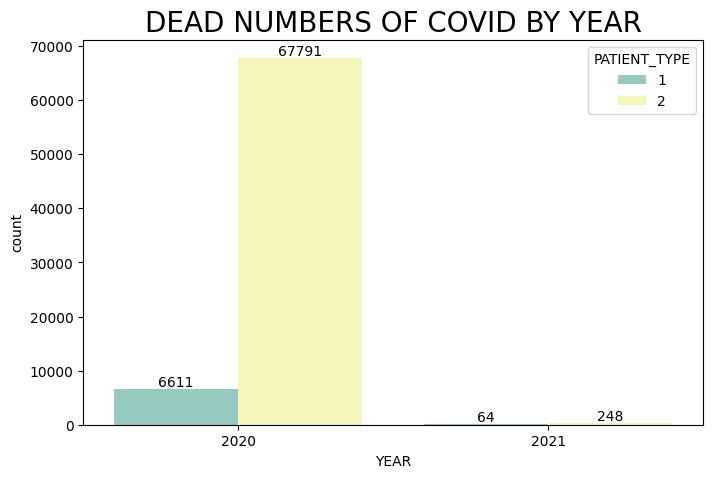

In [19]:
#count number of patients died each year by patient type (1=not hopitalized, 2=hospitalized)
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "YEAR", hue = "PATIENT_TYPE", data = df)
plt.title("DEAD NUMBERS OF COVID BY YEAR", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

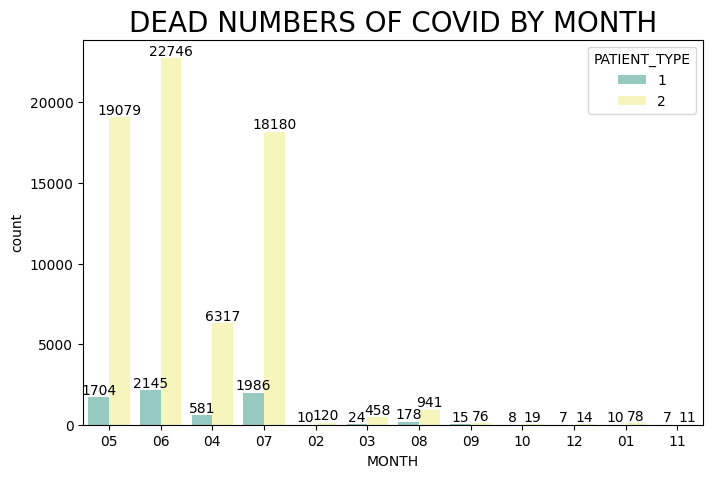

In [20]:
#months ppl most died in
plt.figure(figsize = (8,5))
ax = sns.countplot(x = "MONTH", hue = "PATIENT_TYPE", data = df)
plt.title("DEAD NUMBERS OF COVID BY MONTH", fontsize = 20)
for bars in ax.containers:
    ax.bar_label(bars)

In [21]:
#drop death info
df.drop(["DATE_DIED", "MONTH", "YEAR"], axis = 1, inplace = True)

df["CLASIFFICATION_FINAL"] = df["CLASIFFICATION_FINAL"] - 1

## Xgboost Model

In [22]:
#drop targets from x and set them as y
x = df.drop("CLASIFFICATION_FINAL", axis = 1)
y = df["CLASIFFICATION_FINAL"]

In [23]:
from sklearn.model_selection import train_test_split
#split data into training and test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.3, random_state = 0) #rand state so same rando shuffle

In [24]:
from xgboost import XGBClassifier
#init model
xgb = XGBClassifier(n_estimators = 200, 
                    learning_rate=0.1)
#train model
xgb.fit(x_train, y_train)
#pred with model
pred = xgb.predict(x_test)

In [25]:
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
#compute forms of accuracy
accuracy_score(pred, y_test)
roc_auc_score(pred, y_test)
#display accuracies
print("XGB Model's Accuracy is "+str(accuracy_score(pred, y_test)))
print("XGB Model's AUC score is "+str(roc_auc_score(pred, y_test)))

XGB Model's Accuracy is 0.6652728372341048
XGB Model's AUC score is 0.655213071053069


## Feature Importance

In [26]:
df_importances = pd.DataFrame(list(x), xgb.feature_importances_)
df_importances.columns = ["Feature_Names"]
df_importances["Importances"] = df_importances.index
df_importances = df_importances.sort_values(by = "Importances", ascending = False)
df_importances.index = np.arange(0,len(df_importances))

df_importances

,Feature_Names,Importances
0,PNEUMONIA,0.583816
1,PATIENT_TYPE,0.129989
2,OBESITY,0.037612
3,AGE,0.037008
4,TOBACCO,0.024308
5,SEX,0.023564
6,MEDICAL_UNIT,0.022823
7,RENAL_CHRONIC,0.020644
8,COPD,0.020492
9,INMSUPR,0.019068
